<a href="https://www.kaggle.com/code/ameau01/uber-fare-prediction?scriptVersionId=237283677" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CSCA-5622: Supervised Machine Learning - Final Project #


<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/Uber1.jpg" alt="." width="300">

## Uber Dynamic Fare Prediction ##
### - Adapting Supervised Machine Learning Model on Time Series Data ###
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5622-final-project/tree/main](https://github.com/alme9155/csca-5622-final-project/tree/main)  
---

## I. Project Description ##

This is the final project of CSCA-5622: Supervised Learning Algorithms in Machine Learning.

### Topic: **Uber Dynamic Fare Prediction - Adapting Supervised Machine Learning Model on Time Series Data.** ###

### I.i. Objective: ####

This project aims to predict Uber fares dynamically, adjusting rush hour periods and days of the week. By using adapting supervised learning methods on the Uber fare dataset, this Project analysis takes a cross-sectional approach to fare prediction using auto-regression on a time series dataset.

### I.ii. Background ####

What is a **time series** dataset?

**Time series data** is a sequence of data points collected over time, where each point is associated with a specific timestamp. The key characteristic is that the order of the data points matters, as they are recorded sequentially at particular intervals (e.g., hourly, daily, monthly). Common examples include stock prices, and weather measurements. Using regression on time series data often involves modeling how past events or patterns to predict future event occurrences.

What is the concept of **auto-regression (AR)**?
**Autoregression (AR)** is a time series modeling technique where the current value of a variable is predicted based on its **own past values**. It assumes that past observations have a **linear influence** on the present. An AR model of order *p* (AR(*p*)) uses the previous *p* time steps as predictors. It’s best suited for **stationary** data with consistent patterns over time.


### I.iii. Project Significance ###

This project aims to answer this question: 

**Can we predict Uber fares on weekdays based on the fare from the same time in the previous week? How accurate would such a prediction be?** 

As a frequent Uber rider, I’ve noticed that weekday fares often follow a predictable pattern. While weekend fares tend to fluctuate due to various factors, weekday travel is generally structured around typical rush hours when people commute to and from work. If this intuition is correct, could we use supervised learning to predict Uber fares? Is there an underlying trend in weekday fare behavior? This problem is particularly interesting because future fares may be related to past fares—suggesting a potential autoregressive relationship across time, making it well-suited for time-series analysis.


### I.iv. Machine Learning algorithm used in this project: ###

* Linear Regression
* Random Forest
* Ada Boosting

### Dataset: ###

"Uber Fares Dataset" from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset).


## II. Dataset Description: ##

The Uber Fares Dataset from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset) contains over 200,000 records of uber trip data collected from Uber API. Each row in the Uber fares dataset captures details such as the fare amount, pickup and dropoff times, locations, and passenger count.

### Columns: ###

- **key** : a unique identifier for each trip
- **fare_amount** : the cost of each trip in usd
- **pickup_datetime** : date and time when the meter was engaged
- **passenger_count** : the number of passengers in the vehicle (driver entered value)
- **pickup_longitude** : the longitude where the meter was engaged
- **pickup_latitude** : the latitude where the meter was engaged
- **dropoff_longitude** : the longitude where the meter was disengaged
- **dropoff_latitude** : the latitude where the meter was disengaged


## III. Exploratory Data Analysis ##

### III.i.Loading the data from Kaggle ###
This notebook require internet connection to access dataset from the kaggle dataset.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# loading the data
data = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')
# data = data.drop("Unnamed: 0", axis=1)
data = data.drop("key", axis=1)


print(f"Data loaded successfully.")

### III.ii.Exploring and understanding the data ###

Perform a thorough exploratory data analysis (EDA) using appropriate visualizations, and then summarize the key findings to formulate project strategy.

In [21]:
# EDA process
# 1. load the dataset
# 2. inspect the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

print(f"\nDataSet Info:")
print("--------------------------")
print(data.info())
print(f"\nDataSet Shape:")
print("--------------------------")
print(f"Data Shape: {data.shape[0]} Rows x {data.shape[1]} Columns")
# print(data.shape)

print(f"\nFirst five rows of training data:")
print("--------------------------") 
df_head = data.head(5)
display(df_head)

print(f"\nNaN values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nINF, -INF values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nNull values in non-numeric columns:")
print("--------------------------")    
print(data.select_dtypes(include='object').columns.isnull().sum())

numeric_columns = data.select_dtypes(exclude='object').columns
zero_counts = (data[numeric_columns] == 0).sum().sort_values(ascending=False)
print("\nNumber of zeros in each numeric column:")
print("----------------------------------------")
df_zeros = pd.DataFrame({
    'Column Name': zero_counts.index,
    'Number of Zeros': zero_counts.values
})
df_zeros['% of Zeros Rows'] = ((df_zeros['Number of Zeros'] / data.shape[0]) * 100).round(2).astype(str)+"%"
display(df_zeros)

# find the range of dataset based on pickup datetime
print("\nRange of ride date/time in uber fare dataset:")
print("----------------------------------------")
min_datetime = pd.to_datetime(data['pickup_datetime'].min())
max_datetime = pd.to_datetime(data['pickup_datetime'].max())

print("Earliest pickup_datetime:", min_datetime)
print("Latest pickup_datetime:", max_datetime)
print("Datetime range:", max_datetime - min_datetime)


DataSet Info:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB
None

DataSet Shape:
--------------------------
Data Shape: 200000 Rows x 8 Columns

First five rows of training data:
--------------------------


,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5



NaN values in dataset:
--------------------------
NaN values in dataset:
Unnamed: 0           0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

INF, -INF values in dataset:
--------------------------
NaN values in dataset:
Unnamed: 0           0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Null values in non-numeric columns:
--------------------------
0

Number of zeros in each numeric column:
----------------------------------------


,Column Name,Number of Zeros,% of Zeros Rows
0,pickup_longitude,3786,1.89%
1,pickup_latitude,3782,1.89%
2,dropoff_longitude,3764,1.88%
3,dropoff_latitude,3758,1.88%
4,passenger_count,709,0.35%
5,fare_amount,5,0.0%
6,Unnamed: 0,0,0.0%



Range of ride date/time in uber fare dataset:
----------------------------------------
Earliest pickup_datetime: 2009-01-01 01:15:22+00:00
Latest pickup_datetime: 2015-06-30 23:40:39+00:00
Datetime range: 2371 days 22:25:17


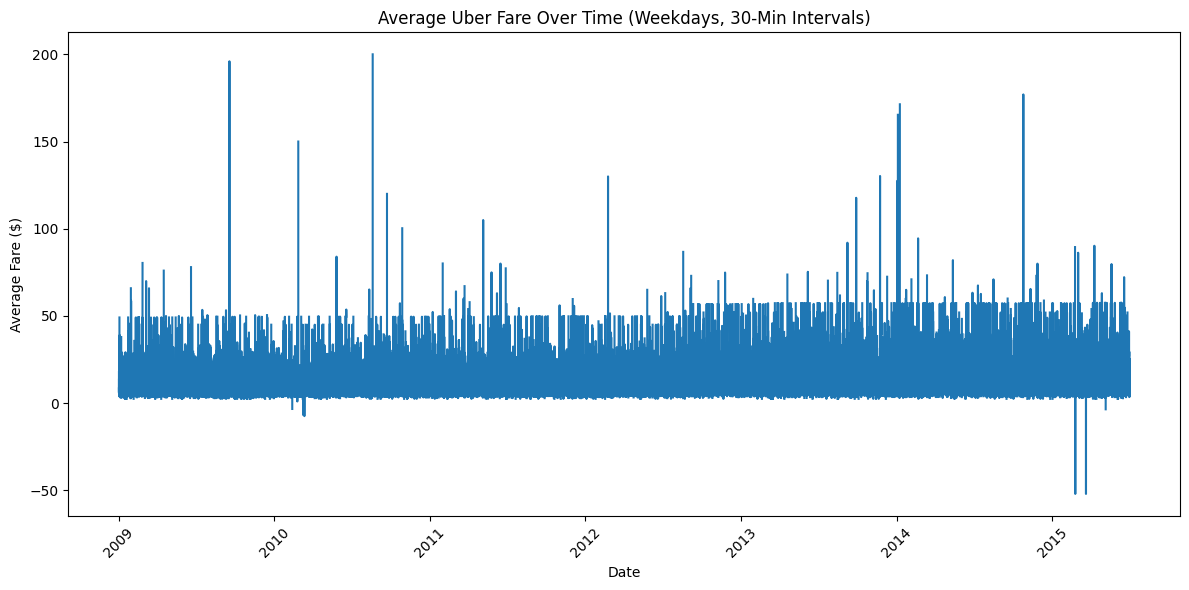

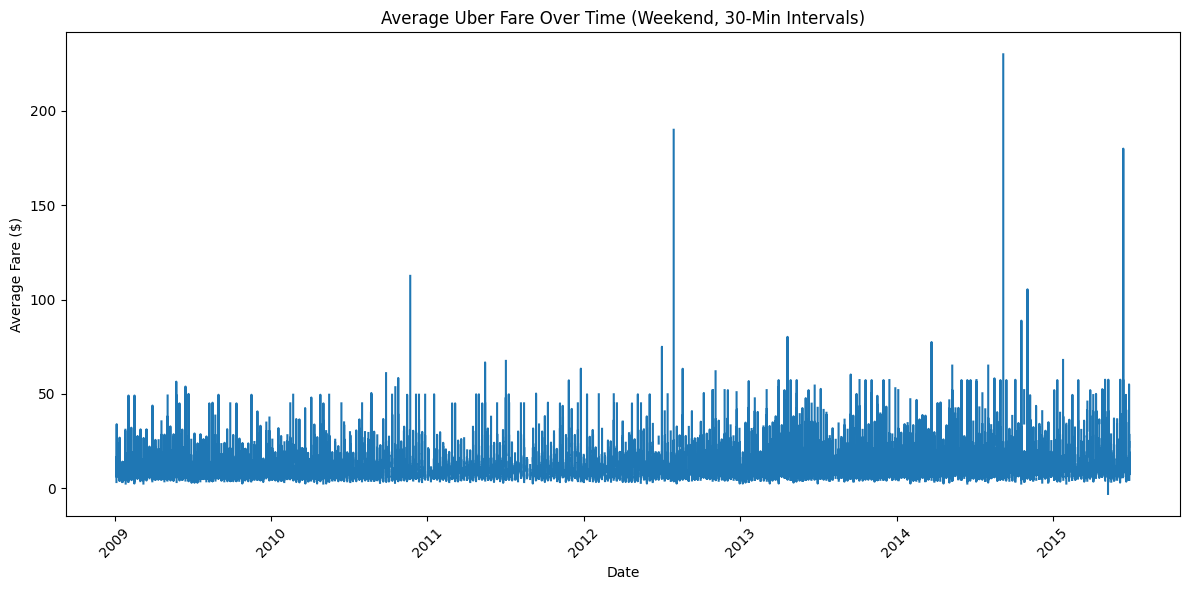

In [22]:
# Plot average uber fare on weekdays
import warnings
# Suppress FutureWarning from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data_weekday = data[data['pickup_datetime'].dt.dayofweek < 5]
data_agg = data_weekday.groupby(pd.Grouper(key='pickup_datetime', freq='30min'))['fare_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(data_agg['pickup_datetime'], data_agg['fare_amount'])
plt.title('Average Uber Fare Over Time (Weekdays, 30-Min Intervals)')
plt.xlabel('Date')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data_weekend = data[data['pickup_datetime'].dt.dayofweek > 5]

data_agg = data_weekend.groupby(pd.Grouper(key='pickup_datetime', freq='30min'))['fare_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(data_agg['pickup_datetime'], data_agg['fare_amount'])
plt.title('Average Uber Fare Over Time (Weekend, 30-Min Intervals)')
plt.xlabel('Date')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

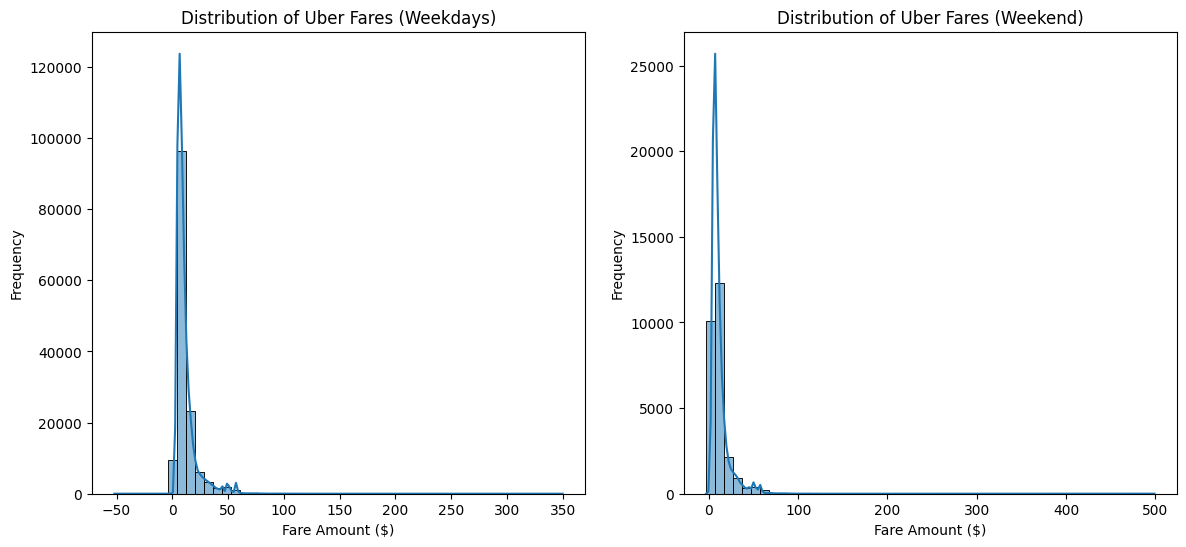

In [23]:
# Plot of distribution of uber fares on weekdays (Mon-Fri)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_weekday['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fares (Weekdays)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

# Plot of distribution of uber fares on weekends (Sat-Sun)
plt.subplot(1, 2, 2)
sns.histplot(data_weekend['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fares (Weekend)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

### III.iii. EDA summary and Modelling Stretegy ###

* **Data Source**: Kaggle
* **Data Collection** : Data collected from Uber public API
* **Data Size** :This dataset has 200,000 rows and 6 columns.
* **Attributes** : Attributes can be grouped into 4 categories:

   *  **Metadata** : key
   *  **Trip distance** : pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
   *  **Passenger information** : passenger_count
   *  **Fare information** : passenger count

* **Data Quality**:

   *  1 rows NaN in column: dropoff_longitude, dropoff_latitude
   *  No NaN in fare_amount, pickup_datetime, passenger_count
   *  About 2% of records has zero values in pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
   *  No Inf or -Inf values

* **Data Distribution**:

   *  There are fare spike over 200 dollars during rush hours
   *  There are few entries with negative fare amount or zero passengers.
   *  Average fares received for driving 30 mins: 0 - 50 dollars
   *  Fares earned during weekday is more consistent than weekends (less spike of fares received)
   *  Frequency: The majority of fares are low (e.g., ~120,000 rides below 10 dollars)
   *  Fare frequency dropping sharply as fares increase.
   *  Typical of transportation fare data where short, low-cost rides dominate.



## IV. Data Clearning and Pre-Processing ##

### IV.i. Data Clearning ###

* Data Cleaning needs:
   * Need to drop invalid distance records with Nan, and rows with zero values
   * Need to drop all invalid fare records with negative fares.
   * Need to remove outliner during surge hours (clip fare above 100 dollars)
   * Passenger count is irrelevant for the fare prediction, zero values will be replace with median.

In [24]:
# Cleaning invalid entries
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data[data['fare_amount'] > 0]
data['fare_amount'] = data['fare_amount'].clip(lower=2, upper=100)
data = data[(data['pickup_longitude'] != 0) & (data['pickup_latitude'] != 0)]
data = data[(data['dropoff_longitude'] != 0) & (data['dropoff_latitude'] != 0)]
data['passenger_count'] = data['passenger_count'].replace(0, data['passenger_count'].median())

print(f"Data cleaning complete.")

Data cleaning complete.


### IV.ii. Distance Pre-Processing ###

* Distance Pre-processing needs:
   * Need to calculate the distance traveled from the longtitude and latitude coordinates for fare predictions.
   * Standard method to calculate distance travelled between two coordinates is the haversine formula
   * Ref: [https://en.wikipedia.org/wiki/Haversine_formula](https://en.wikipedia.org/wiki/Haversine_formula)


In [25]:
# calculate distance in miles
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.square(np.sin(dlat / 2.0)) + np.cos(lat1) * np.cos(lat2) * np.square(np.sin(dlon / 2.0))
    c = 2 * np.arcsin(np.sqrt(a))    
    r = 3958.8  # Radius of Earth in miles
    return c * r

# add new column distance
data['distance'] = haversine(
    data['pickup_latitude'], data['pickup_longitude'],
    data['dropoff_latitude'], data['dropoff_longitude']
)

print(f"Distance pre-processing complete.")

Distance pre-processing complete.


### IV.iii. Date Pre-Processing  ###

* Date Pre-processing needs:
   * In predict uber fares based on season and day of the week, we need to derive date features to enrich the dataset.
     
* Pre-Processing strategy:
   * The Uber fare dataset contains roughly six years of fare information.
   * It is adequate for studying how prices fluctuate across different seasons.

We can derive the following attributes based on "pickup_datetime":
   * **trip_hour** : hour when the trip begins (24 hour clock)
   * **trip_day_of_week**: 0=Monday, 4=Friday, 6=Sunday
   * **trip_month** : 1=January, ... 12=Decembber
   * **trip_year** : 4 digit year, such as 1994
   * **trip_season** : Winter (Dec-Feb), Spring (Mar-May), Summer (Jun-Aug), Fall (Sep- Nov)
   * **trip_season_num** : 0=(Winter), 1=Spring, 2=Summer, 3=Fall
   * **is_rush_hour**: 0-No, 1-Yes (7:00am -9:59am) or (4:00pm -6:59pm)


In [26]:
# Derive columns from pickup_datetime

data['pickup_datetime_dt'] = pd.to_datetime(data['pickup_datetime'])
data['trip_hour'] = data['pickup_datetime_dt'].dt.hour
data['trip_day_of_week'] = data['pickup_datetime_dt'].dt.dayofweek  # 0=Monday, 4=Friday
data['trip_month'] = data['pickup_datetime_dt'].dt.month  # 1–12
data['trip_year'] = data['pickup_datetime_dt'].dt.year  # 2009–2015
data['is_rush_hour'] = data['trip_hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
data['trip_season'] = data['trip_month'].apply(get_season)

def get_season_num(month):
    if month in [12, 1, 2]:
        return 0
    elif month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    else:
        return 3
data['trip_season_num'] = data['trip_month'].apply(get_season_num)


data = data.drop('pickup_datetime_dt', axis=1)
print(f"Derived Datetime columns added.")



Derived Datetime columns added.


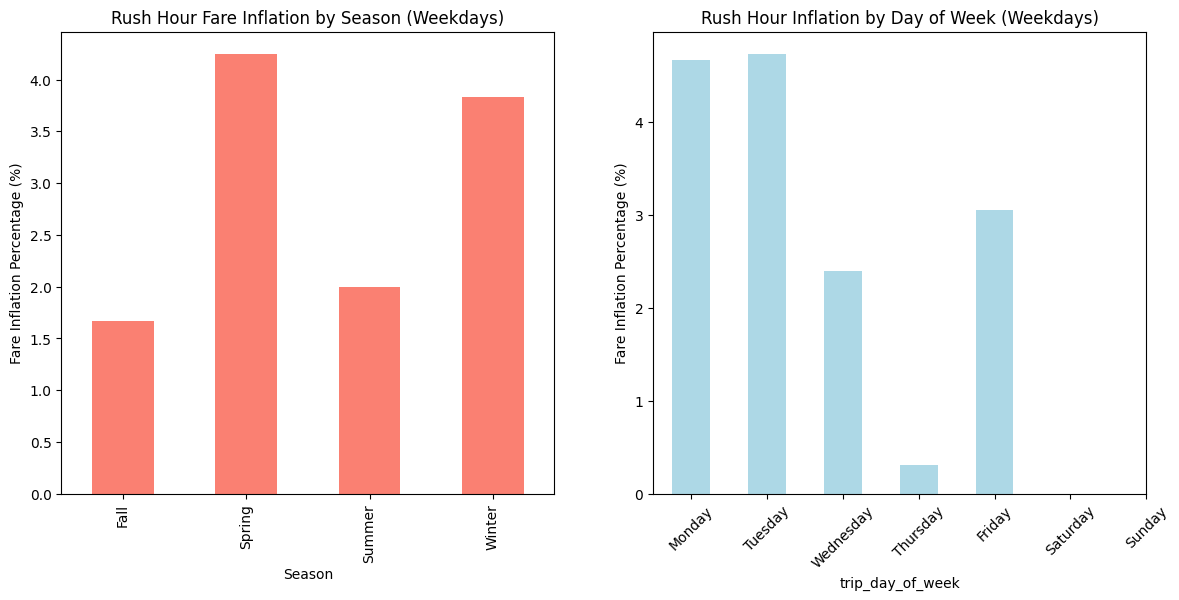

In [28]:
# Reduce dataset to weekday only.
data = data[data['trip_day_of_week'] <5]

# Plot Rush Hour Fare Inflation by Season
rush_inflation = data.groupby(['trip_season', 'is_rush_hour'])['fare_amount'].mean().unstack()
rush_inflation['inflation_percentage'] = ((rush_inflation[0] - rush_inflation[1]) / rush_inflation[0] * 100).round(2)
# print("Rush Hour Inflation by Season (%):")
# print(rush_inflation)


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
rush_inflation['inflation_percentage'].plot(kind='bar', color='salmon')
plt.title('Rush Hour Fare Inflation by Season (Weekdays)')
plt.xlabel('Season')
plt.ylabel('Fare Inflation Percentage (%)')

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_inflation_day = data.groupby(['trip_day_of_week', 'is_rush_hour'])['fare_amount'].mean().unstack()
rush_inflation_day['inflation_percentage'] = ((rush_inflation_day[0] - rush_inflation_day[1]) / rush_inflation_day[0] * 100).round(2)
# print("Rush Hour Fare Inflation by Day of Week (%):")
# print(rush_inflation_day)

plt.subplot(1, 2, 2)
rush_inflation_day['inflation_percentage'].plot(kind='bar', color='lightblue')
plt.title('Rush Hour Inflation by Day of Week (Weekdays)')
plt.xticks(ticks=range(len(day_names)), labels=day_names, rotation=45)  # Set x-axis labels to day names
plt.ylabel('Fare Inflation Percentage (%)')
plt.show()


### IV.iii. Fare Pre-Processing and Modeling Strategy ###

* Data Pre-processing needs:
   * The presence of spikes, negative values indicates non-stationarity.
   * Since the fare data is skewed, log transformation is required before applying machine learning models.
   * After fare are log transformed, need to calculate the fare of previous day

* Pre-Processing strategy:
   * Since Weekends fare data exhibit greater variability, we should reduce the dataset to weekday only to have more consistent fare prediction.
   * Focusing on weekdays reduce skewness benefiting linear regression, but might not impact on Random Forest, or gradient bossting.
   * The decision of focusing on weekday fares reduce the data set by 15%
   * feature engineering is required to introduce 24 hours to capture temporal patterns

* Pre-Processing strategy:
Calculating a **lag column** in your Uber fare exercise allows you to capture **temporal dependencies** in the data—such as how current fare levels may be influenced by fares at the same time **24 hours earlier**. This is especially important for modeling patterns like **daily seasonality**, rush hours, or recurring demand cycles. Including lag features turns time-series data into a format usable by classical supervised learning models that assume independent rows, enabling them to learn from **past values as predictors** for current or future fares.

In [ ]:
# create fare column to calculate fares from 24 hours ago, within the windows of 30 mins.
if 'lagged_log_fare' in data:
    data = data.drop('lagged_log_fare', axis=1)
global_mean = data['log_fare_amount'].mean()

# Calculate lagged log fare 
def get_lagged_log_fare(df, current_time, lag_days=7, window_minutes=30, fallback=np.nan):
    lagged_time = current_time - pd.Timedelta(days=lag_days)  # 7-day lag
    window_start = lagged_time - pd.Timedelta(minutes=window_minutes / 2)
    window_end = lagged_time + pd.Timedelta(minutes=window_minutes / 2)
    window_rides = df[(df['pickup_datetime'] >= window_start) &
                      (df['pickup_datetime'] <= window_end)]
    if not window_rides.empty:
        return window_rides['log_fare_amount'].mean()
    return fallback

lag_values = np.empty(len(data), dtype=float)
lag_values[:] = np.nan

for idx, current_time in enumerate(data['pickup_datetime']):
    lag_values[idx] = get_lagged_log_fare(data, current_time, lag_days=7, fallback=np.nan)
data['lagged_log_fare'] = lag_values

# Fill missing value with hourly means
hourly_means = data.groupby('trip_hour')['lagged_log_fare'].mean()
hourly_means = hourly_means.fillna(global_mean) 
data['lagged_log_fare'] = data.apply(
    lambda row: hourly_means[row['trip_hour']] if pd.isna(row['lagged_log_fare']) else row['lagged_log_fare'],
    axis=1
)

data['lagged_log_fare'] = data['lagged_log_fare'].fillna(global_mean)
data['lagged_log_fare'] = data['lagged_log_fare'].replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['log_fare_amount', 'lagged_log_fare', 'trip_hour'])
data = data[data['lagged_log_fare'] > 0]
print("lagged_log_fare preprocessing complete.")

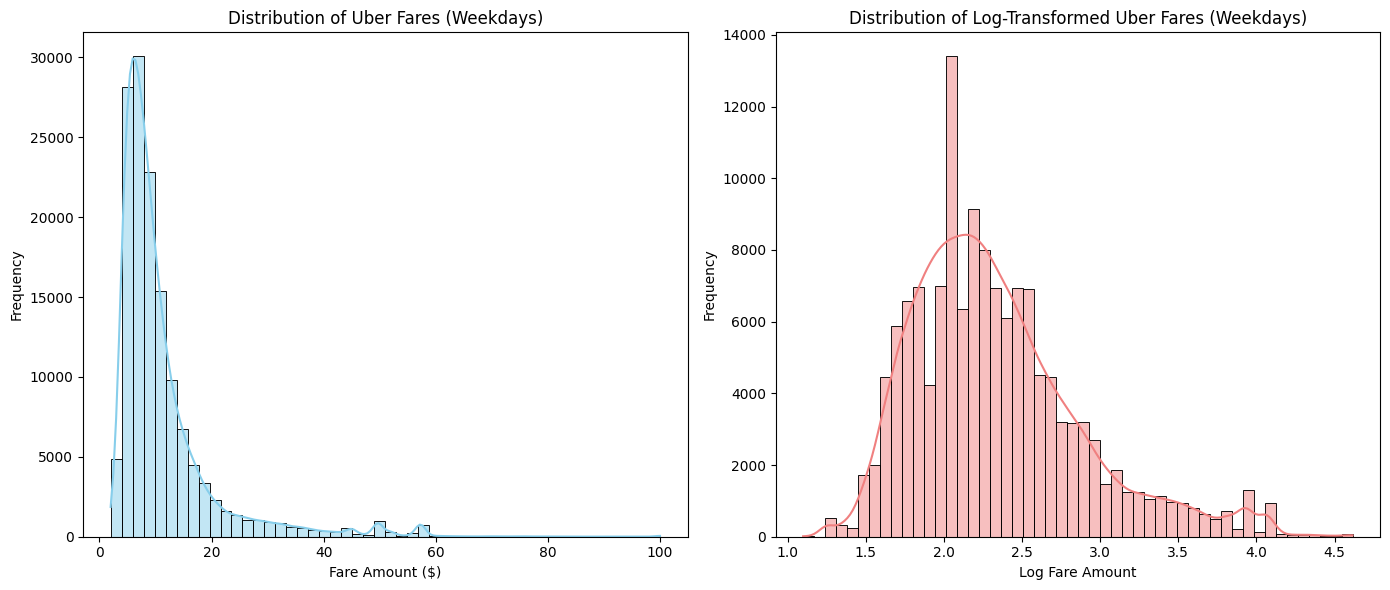

In [29]:
# reduce dataset to weekday only.
data = data[data['pickup_datetime'].dt.dayofweek < 5]

# Log transform fare_amount
if 'log_fare_amount' in data:
    data = data.drop('log_fare_amount', axis=1)
data['log_fare_amount'] = np.log1p(data['fare_amount'])

# plot log fare vs uber fares
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Uber Fares (Weekdays)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['log_fare_amount'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Log-Transformed Uber Fares (Weekdays)')
plt.xlabel('Log Fare Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Drop existing lagged_log_fare if it exists
if 'lagged_log_fare' in data:
    data = data.drop('lagged_log_fare', axis=1)

# Calculate global mean for fallback
global_mean = data['log_fare_amount'].mean()

# Function to calculate lagged log fare for a given lag (hours) and time window
def get_lagged_log_fare(df, current_time, lag_hours=24, window_minutes=30, fallback=np.nan):
    lagged_time = current_time - pd.Timedelta(hours=lag_hours)
    window_start = lagged_time - pd.Timedelta(minutes=window_minutes / 2)
    window_end = lagged_time - pd.Timedelta(minutes=window_minutes / 2)
    window_rides = df[(df['pickup_datetime'] >= window_start) &
                      (df['pickup_datetime'] <= window_end)]
    if not window_rides.empty:
        return window_rides['log_fare_amount'].mean()
    return fallback

# Calculate lagged_fare_by_week (24-hour lag, 72-hour for Monday)
lag_values_week = np.empty(len(data), dtype=float)
lag_values_week[:] = np.nan

for idx, current_time in enumerate(data['pickup_datetime']):
    lag_hours = 72 if current_time.dayofweek == 0 else 24  # Monday uses Friday
    lag_values_week[idx] = get_lagged_log_fare(data, current_time, lag_hours=lag_hours, window_minutes=30, fallback=np.nan)

data['lagged_fare_by_week'] = lag_values_week

# Calculate lagged_fare_by_day (24-hour lag for all days, including Monday)
lag_values_day = np.empty(len(data), dtype=float)
lag_values_day[:] = np.nan

for idx, current_time in enumerate(data['pickup_datetime']):
    lag_values_day[idx] = get_lagged_log_fare(data, current_time, lag_hours=24, window_minutes=30, fallback=np.nan)

data['lagged_fare_by_day'] = lag_values_day

# Ensure 'hour' column exists
data['hour'] = data['pickup_datetime'].dt.hour

# Fill missing values with hourly means
hourly_means_week = data.groupby('hour')['lagged_fare_by_week'].mean()
hourly_means_week = hourly_means_week.fillna(global_mean)

hourly_means_day = data.groupby('hour')['lagged_fare_by_day'].mean()
hourly_means_day = hourly_means_day.fillna(global_mean)

# Apply hourly means for NaN values
data['lagged_fare_by_week'] = data.apply(
    lambda row: hourly_means_week[row['hour']] if pd.isna(row['lagged_fare_by_week']) else row['lagged_fare_by_week'],
    axis=1
)
data['lagged_fare_by_day'] = data.apply(
    lambda row: hourly_means_day[row['hour']] if pd.isna(row['lagged_fare_by_day']) else row['lagged_fare_by_day'],
    axis=1
)

# Final cleanup: Replace NaN, inf, and negative values
data['lagged_fare_by_week'] = data['lagged_fare_by_week'].fillna(global_mean)
data['lagged_fare_by_week'] = data['lagged_fare_by_week'].replace([np.inf, -np.inf], np.nan)
data['lagged_fare_by_day'] = data['lagged_fare_by_day'].fillna(global_mean)
data['lagged_fare_by_day'] = data['lagged_fare_by_day'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in critical columns and filter out non-positive lagged fares
data = data.dropna(subset=['log_fare_amount', 'lagged_fare_by_week', 'lagged_fare_by_day', 'hour'])
data = data[(data['lagged_fare_by_week'] > 0) & (data['lagged_fare_by_day'] > 0)]

print("Lagged fare preprocessing complete: 'lagged_fare_by_week' and 'lagged_fare_by_day' added.")

In [ ]:
# create fare column to calculate fares from 24 hours ago, within the windows of 30 mins.
if 'lagged_log_fare' in data:
    data = data.drop('lagged_log_fare', axis=1)
global_mean = data['log_fare_amount'].mean()

# Calculate lagged log fare 
def get_lagged_log_fare(df, current_time, lag_hours=24, window_minutes=30, fallback=np.nan):
    lagged_time = current_time - pd.Timedelta(hours=lag_hours)
    window_start = lagged_time - pd.Timedelta(minutes=window_minutes / 2)
    window_end = lagged_time + pd.Timedelta(minutes=window_minutes / 2)
    window_rides = df[(df['pickup_datetime'] >= window_start) &
                      (df['pickup_datetime'] <= window_end)]
    if not window_rides.empty:
        return window_rides['log_fare_amount'].mean()
    return fallback

lag_values = np.empty(len(data), dtype=float)
lag_values[:] = np.nan

for idx, current_time in enumerate(data['pickup_datetime']):
    lagged_hours = 72 if current_time.dayofweek == 0 else 24  # Monday uses Friday
    lag_values[idx] = get_lagged_log_fare(data, current_time, lag_hours=lagged_hours, fallback=np.nan)
data['lagged_log_fare'] = lag_values

# Fill missing value with hourly means
data['hour'] = data['pickup_datetime'].dt.hour
hourly_means = data.groupby('hour')['lagged_log_fare'].mean()
hourly_means = hourly_means.fillna(global_mean) 
data['lagged_log_fare'] = data.apply(
    lambda row: hourly_means[row['hour']] if pd.isna(row['lagged_log_fare']) else row['lagged_log_fare'],
    axis=1
)

data['lagged_log_fare'] = data['lagged_log_fare'].fillna(global_mean)
data['lagged_log_fare'] = data['lagged_log_fare'].replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['log_fare_amount', 'lagged_log_fare', 'hour'])
data = data[data['lagged_log_fare'] > 0]
print("lagged_log_fare preprocessing complete.")

### IV. Feature Engineering ###

* Data Pre-processing needs:
   * The presence of spikes, negative values indicates non-stationarity.
   * Since the fare data is skewed, log transformation is required before applying machine learning models.
   * fares amount should be log transformed before modeling.
* Pre-Processing strategy:
   * Since Weekends fare data exhibit greater variability, we should reduce the dataset to weekday only to have more consistent fare prediction.
   * Focusing on weekdays reduce skewness benefiting linear regression, but might not impact on Random Forest, or gradient bossting.
   * The decision of focusing on weekday fares reduce the data set by 15%
   * feature engineering is required to introduce 24 hours to capture temporal patterns (Details explanation below)

In [ ]:
data.head(5)

In [ ]:
# Feature selection: Include all columns except lagged_log_fare and log_fare_amount
exclude_columns = ['lagged_log_fare', 'log_fare_amount', 'pickup_datetime', 'trip_season', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'key']
features = [col for col in data.columns if col not in exclude_columns]
print("Features for selection:", features)

# Feature selection using correlation with target
corr_matrix = data[features + ['log_fare_amount']].corr()
selected_features = corr_matrix['log_fare_amount'].abs().sort_values(ascending=False).index[1:6].tolist()  # Top 5 features
print("Selected features based on correlation:", selected_features)

In [ ]:
print(data.info())

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

exclude_columns = ['lagged_log_fare', 'log_fare_amount', 'pickup_datetime', 'key']
features = [col for col in data.columns if col not in exclude_columns]
print("Features for PCA:", features)

# Prepare feature matrix for PCA
X_pca = data[features].copy()

# Handle categorical variables (e.g., trip_season) by encoding
X_pca = pd.get_dummies(X_pca, columns=['trip_season'], drop_first=True)

# Standardize features for PCA
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)



In [ ]:
# Determine number of components explaining 95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of PCA components explaining 95% variance: {n_components}")

# Re-run PCA with selected number of components
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_pca_scaled)
X_pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)], index=X_pca.index)

# Add is_rush_hour for evaluation (not used in PCA)
X_pca_df['is_rush_hour'] = data['is_rush_hour']

# Final feature set
X = X_pca_df
y = data['log_fare_amount']

X = X.dropna()
y = y.loc[X.index]

In [ ]:
# Linear Regression
from sklearn.linear_model import Ridge

# Train-test split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break

# Train Ridge Regression (alpha=1 for regularization)
lr_model = Ridge(alpha=1.0)
lr_model.fit(X_train.drop('is_rush_hour', axis=1), y_train)

# Display Linear Regression coefficients
coefficients = pd.DataFrame({
    'Component': X_train.drop('is_rush_hour', axis=1).columns,
    'Coefficient': lr_model.coef_
})
print("Linear Regression Coefficients after PCA:")
print(coefficients)

# Apply smearing correction
y_train_pred_lr = lr_model.predict(X_train.drop('is_rush_hour', axis=1))
residuals_log_lr = y_train - y_train_pred_lr
smearing_factor_lr = np.mean(np.exp(residuals_log_lr))
y_test_pred_log_lr = lr_model.predict(X_test.drop('is_rush_hour', axis=1))
y_test_pred_lr = np.exp(y_test_pred_log_lr) * smearing_factor_lr
y_test_true_lr = np.exp(y_test)

# Evaluate performance
rush_test_idx_lr = X_test['is_rush_hour'] == 1
non_rush_test_idx_lr = X_test['is_rush_hour'] == 0

mae_rush_lr = mean_absolute_error(y_test_true_lr[rush_test_idx_lr], y_test_pred_lr[rush_test_idx_lr])
rmse_rush_lr = np.sqrt(mean_squared_error(y_test_true_lr[rush_test_idx_lr], y_test_pred_lr[rush_test_idx_lr]))
mae_non_rush_lr = mean_absolute_error(y_test_true_lr[non_rush_test_idx_lr], y_test_pred_lr[non_rush_test_idx_lr])
rmse_non_rush_lr = np.sqrt(mean_squared_error(y_test_true_lr[non_rush_test_idx_lr], y_test_pred_lr[non_rush_test_idx_lr]))
mae_overall_lr = mean_absolute_error(y_test_true_lr, y_test_pred_lr)
rmse_overall_lr = np.sqrt(mean_squared_error(y_test_true_lr, y_test_pred_lr))

# Store RMSE values
rmse_values = {
    'Linear Regression': {'Rush': rmse_rush_lr, 'Non-Rush': rmse_non_rush_lr, 'Overall': rmse_overall_lr}
}

# Plot predicted vs. true fares
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true_lr[rush_test_idx_lr], y_test_pred_lr[rush_test_idx_lr], alpha=0.5, label='Rush Hour', color='red')
plt.scatter(y_test_true_lr[non_rush_test_idx_lr], y_test_pred_lr[non_rush_test_idx_lr], alpha=0.5, label='Non-Rush Hour', color='blue')
plt.plot([y_test_true_lr.min(), y_test_true_lr.max()], [y_test_true_lr.min(), y_test_true_lr.max()], 'k--', lw=2)
plt.xlabel('True Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title('Linear Regression: Predicted vs. True Fares')
plt.legend()
plt.show()

# Plot prediction errors
errors_lr = y_test_true_lr - y_test_pred_lr
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true_lr[rush_test_idx_lr], errors_lr[rush_test_idx_lr], alpha=0.5, label='Rush Hour', color='red')
plt.scatter(y_test_true_lr[non_rush_test_idx_lr], errors_lr[non_rush_test_idx_lr], alpha=0.5, label='Non-Rush Hour', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('True Fare ($)')
plt.ylabel('Prediction Error ($)')
plt.title('Linear Regression: Prediction Errors')
plt.legend()
plt.show()

In [ ]:
# Linear Regression
# Add regularization with Ridge to prevent overfitting
from sklearn.linear_model import Ridge

# Train-test split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break

# Train Ridge Regression (alpha=1 for regularization)
lr_model = Ridge(alpha=1.0)
lr_model.fit(X_train, y_train)

# Apply smearing correction
y_train_pred_lr = lr_model.predict(X_train)
residuals_log_lr = y_train - y_train_pred_lr
smearing_factor_lr = np.mean(np.exp(residuals_log_lr))
y_test_pred_log_lr = lr_model.predict(X_test)
y_test_pred_lr = np.exp(y_test_pred_log_lr) * smearing_factor_lr
y_test_true_lr = np.exp(y_test)

# Evaluate performance
rush_test_idx_lr = X_test['dynamic_rush_hour'] == 1
non_rush_test_idx_lr = X_test['dynamic_rush_hour'] == 0

mae_rush_lr = mean_absolute_error(y_test_true_lr[rush_test_idx_lr], y_test_pred_lr[rush_test_idx_lr])
rmse_rush_lr = np.sqrt(mean_squared_error(y_test_true_lr[rush_test_idx_lr], y_test_pred_lr[rush_test_idx_lr]))
mae_non_rush_lr = mean_absolute_error(y_test_true_lr[non_rush_test_idx_lr], y_test_pred_lr[non_rush_test_idx_lr])
rmse_non_rush_lr = np.sqrt(mean_squared_error(y_test_true_lr[non_rush_test_idx_lr], y_test_pred_lr[non_rush_test_idx_lr]))
mae_overall_lr = mean_absolute_error(y_test_true_lr, y_test_pred_lr)
rmse_overall_lr = np.sqrt(mean_squared_error(y_test_true_lr, y_test_pred_lr))

# Store RMSE values
rmse_values = {
    'Linear Regression': {'Rush': rmse_rush_lr, 'Non-Rush': rmse_non_rush_lr, 'Overall': rmse_overall_lr}
}

# Plot predicted vs. true fares
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true_lr[rush_test_idx_lr], y_test_pred_lr[rush_test_idx_lr], alpha=0.5, label='Rush Hour', color='red')
plt.scatter(y_test_true_lr[non_rush_test_idx_lr], y_test_pred_lr[non_rush_test_idx_lr], alpha=0.5, label='Non-Rush Hour', color='blue')
plt.plot([y_test_true_lr.min(), y_test_true_lr.max()], [y_test_true_lr.min(), y_test_true_lr.max()], 'k--', lw=2)
plt.xlabel('True Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title('Linear Regression: Predicted vs. True Fares')
plt.legend()
plt.show()

# Plot prediction errors
errors_lr = y_test_true_lr - y_test_pred_lr
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true_lr[rush_test_idx_lr], errors_lr[rush_test_idx_lr], alpha=0.5, label='Rush Hour', color='red')
plt.scatter(y_test_true_lr[non_rush_test_idx_lr], errors_lr[non_rush_test_idx_lr], alpha=0.5, label='Non-Rush Hour', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('True Fare ($)')
plt.ylabel('Prediction Error ($)')
plt.title('Linear Regression: Prediction Errors')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Define features and target
X = data[['trip_hour', 'distance', 'lagged_log_fare', 'trip_day_of_week', 'is_rush_hour']]
y = data['log_fare_amount']

# Ensure no NaN values
X = X.dropna()
y = y.loc[X.index]

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Apply smearing correction
y_train_pred = model.predict(X_train)
residuals_log = y_train - y_train_pred
smearing_factor = np.mean(np.exp(residuals_log))
print("Smearing Factor:", smearing_factor)

# Predict and apply smearing correction
y_test_pred_log = model.predict(X_test)
y_test_pred = np.exp(y_test_pred_log) * smearing_factor
y_test_true = np.exp(y_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test_true, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_true, y_test_pred)))
print("R2 Score:", model.score(X_test, y_test))

# Visualize predicted vs. true fares
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, y_test_pred, alpha=0.5, label='Predictions')
plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('True Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title('Predicted vs. True Uber Fares (Gradient Boosting with Smearing Correction)')
plt.legend()
plt.show()

# Visualize prediction errors
errors = y_test_true - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, errors, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('True Fare ($)')
plt.ylabel('Prediction Error ($)')
plt.title('Prediction Errors vs. True Fare (Gradient Boosting)')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming data is the Uber fare dataset after preprocessing
# Add additional features
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['is_rush_hour'] = data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# Define features and target
X = data[['hour', 'distance', 'lagged_log_fare', 'day_of_week', 'is_rush_hour']]
y = data['log_fare_amount']

# Ensure no NaN values
X = X.dropna()
y = y.loc[X.index]

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Use the last split for a single train-test set

# Initialize models (added Linear Regression)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results, including RMSE for comparison
results = {}
rmse_values = {}  # To store RMSE for each model

# Train, predict, and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Apply smearing correction
    y_train_pred = model.predict(X_train)
    residuals_log = y_train - y_train_pred
    smearing_factor = np.mean(np.exp(residuals_log))
    print(f"Smearing Factor ({model_name}):", smearing_factor)
    
    # Predict on test set and apply smearing correction
    y_test_pred_log = model.predict(X_test)
    y_test_pred = np.exp(y_test_pred_log) * smearing_factor
    y_test_true = np.exp(y_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test_true, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2 = model.score(X_test, y_test)  # R2 on log-scale
    
    print(f"MAE ({model_name}):", mae)
    print(f"RMSE ({model_name}):", rmse)
    print(f"R2 Score ({model_name}):", r2)
    
    # Store results and RMSE
    results[model_name] = {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    rmse_values[model_name] = rmse

# Plotting
# Predicted vs. True Fares (2x2 grid for 4 models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to iterate easily

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.scatter(result['y_test_true'], result['y_test_pred'], alpha=0.5, label='Predictions')
    ax.plot([result['y_test_true'].min(), result['y_test_true'].max()], 
            [result['y_test_true'].min(), result['y_test_true'].max()], 
            'k--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Predicted Fare ($)')
    ax.set_title(f'Predicted vs. True Fares ({model_name})\nMAE: {result["mae"]:.3f}, RMSE: {result["rmse"]:.3f}')
    ax.legend()

plt.tight_layout()
plt.show()

# Prediction Errors (2x2 grid for 4 models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    errors = result['y_test_true'] - result['y_test_pred']
    ax.scatter(result['y_test_true'], errors, alpha=0.5)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Prediction Error ($)')
    ax.set_title(f'Prediction Errors vs. True Fare ({model_name})')

plt.tight_layout()
plt.show()

# Compare RMSE with a bar plot
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'skyblue', 'lightcoral', 'salmon']
plt.bar(rmse_values.keys(), rmse_values.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('RMSE ($)')
plt.title('RMSE Comparison: Linear Regression, Random Forest, AdaBoost, Gradient Boosting')
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming data is the Uber fare dataset after preprocessing
# Add additional features
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
# data['is_rush_hour'] = data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# Define features and target
X = data[['hour', 'distance', 'lagged_log_fare', 'day_of_week']]
y = data['log_fare_amount']

# Ensure no NaN values
X = X.dropna()
y = y.loc[X.index]

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Use the last split for a single train-test set

# Initialize models (added Linear Regression)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results, including RMSE for comparison
results = {}
rmse_values = {}  # To store RMSE for each model

# Train, predict, and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Apply smearing correction
    y_train_pred = model.predict(X_train)
    residuals_log = y_train - y_train_pred
    smearing_factor = np.mean(np.exp(residuals_log))
    print(f"Smearing Factor ({model_name}):", smearing_factor)
    
    # Predict on test set and apply smearing correction
    y_test_pred_log = model.predict(X_test)
    y_test_pred = np.exp(y_test_pred_log) * smearing_factor
    y_test_true = np.exp(y_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test_true, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2 = model.score(X_test, y_test)  # R2 on log-scale
    
    print(f"MAE ({model_name}):", mae)
    print(f"RMSE ({model_name}):", rmse)
    print(f"R2 Score ({model_name}):", r2)
    
    # Store results and RMSE
    results[model_name] = {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    rmse_values[model_name] = rmse

# Plotting
# Predicted vs. True Fares (2x2 grid for 4 models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to iterate easily

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.scatter(result['y_test_true'], result['y_test_pred'], alpha=0.5, label='Predictions')
    ax.plot([result['y_test_true'].min(), result['y_test_true'].max()], 
            [result['y_test_true'].min(), result['y_test_true'].max()], 
            'k--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Predicted Fare ($)')
    ax.set_title(f'Predicted vs. True Fares ({model_name})\nMAE: {result["mae"]:.3f}, RMSE: {result["rmse"]:.3f}')
    ax.legend()

plt.tight_layout()
plt.show()

# Prediction Errors (2x2 grid for 4 models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    errors = result['y_test_true'] - result['y_test_pred']
    ax.scatter(result['y_test_true'], errors, alpha=0.5)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Prediction Error ($)')
    ax.set_title(f'Prediction Errors vs. True Fare ({model_name})')

plt.tight_layout()
plt.show()

# Compare RMSE with a bar plot
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'skyblue', 'lightcoral', 'salmon']
plt.bar(rmse_values.keys(), rmse_values.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('RMSE ($)')
plt.title('RMSE Comparison: Linear Regression, Random Forest, AdaBoost, Gradient Boosting')
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming data is the Uber fare dataset after preprocessing
# Add additional features
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['is_rush_hour'] = data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# Define features and target
X = data[['hour', 'distance', 'lagged_log_fare', 'day_of_week', 'is_rush_hour']]
y = data['log_fare_amount']

# Ensure no NaN values
X = X.dropna()
y = y.loc[X.index]

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Use the last split for a single train-test set

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'GradientBoost': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results, including RMSE for comparison
results = {}
rmse_values = {}  # To store RMSE for each model

# Train, predict, and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Apply smearing correction
    y_train_pred = model.predict(X_train)
    residuals_log = y_train - y_train_pred
    smearing_factor = np.mean(np.exp(residuals_log))
    print(f"Smearing Factor ({model_name}):", smearing_factor)
    
    # Predict on test set and apply smearing correction
    y_test_pred_log = model.predict(X_test)
    y_test_pred = np.exp(y_test_pred_log) * smearing_factor
    y_test_true = np.exp(y_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test_true, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2 = model.score(X_test, y_test)  # R2 on log-scale
    
    print(f"MAE ({model_name}):", mae)
    print(f"RMSE ({model_name}):", rmse)
    print(f"R2 Score ({model_name}):", r2)
    
    # Store results and RMSE
    results[model_name] = {
        'y_test_true': y_test_true,
        'y_test_pred': y_test_pred,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    rmse_values[model_name] = rmse

# Plotting
# Predicted vs. True Fares
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    ax.scatter(result['y_test_true'], result['y_test_pred'], alpha=0.5, label='Predictions')
    ax.plot([result['y_test_true'].min(), result['y_test_true'].max()], 
            [result['y_test_true'].min(), result['y_test_true'].max()], 
            'k--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Predicted Fare ($)')
    ax.set_title(f'Predicted vs. True Fares ({model_name})\nMAE: {result["mae"]:.3f}, RMSE: {result["rmse"]:.3f}')
    ax.legend()
plt.tight_layout()
plt.show()

# Prediction Errors
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx]
    errors = result['y_test_true'] - result['y_test_pred']
    ax.scatter(result['y_test_true'], errors, alpha=0.5)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_xlabel('True Fare ($)')
    ax.set_ylabel('Prediction Error ($)')
    ax.set_title(f'Prediction Errors vs. True Fare ({model_name})')
plt.tight_layout()
plt.show()

# Compare RMSE with a bar plot
plt.figure(figsize=(8, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['skyblue', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('RMSE ($)')
plt.title('RMSE Comparison: Random Forest vs. AdaBoost')
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom')
plt.show()

In [ ]:
# Initialize models (added Linear Regression)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Plotting adjustments for four models (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# RMSE bar plot
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'skyblue', 'lightcoral', 'salmon']
plt.bar(rmse_values.keys(), rmse_values.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('RMSE ($)')
plt.title('RMSE Comparison: Linear Regression, Random Forest, AdaBoost, Gradient Boosting')
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.1, f'{v:.3f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = data[['hour', 'distance', 'lagged_log_fare']]
y = data['log_fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Apply smearing correction
y_train_pred = model.predict(X_train)
residuals_log = y_train - y_train_pred
smearing_factor = np.mean(np.exp(residuals_log))
print("Smearing Factor:", smearing_factor)

# Predict on test set and apply smearing correction
y_test_pred_log = model.predict(X_test)
y_test_pred = np.exp(y_test_pred_log) * smearing_factor
y_test_true = np.exp(y_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test_true, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_true, y_test_pred)))

# Visualize predicted vs. true fares
plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, y_test_pred, alpha=0.5)
plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'k--', lw=2)
plt.xlabel('True Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title('Predicted vs. True Uber Fares (Linear Regression with Smearing Correction)')
plt.show()

In [ ]:
print("project complete.")

# 3. Analyze Rush Hour Inflation by Day of Week
rush_inflation_day = data.groupby(['pickup_day_of_week', 'is_rush_hour'])['fare_amount'].mean().unstack()
rush_inflation_day['inflation_percentage'] = ((rush_inflation_day[1] - rush_inflation_day[0]) / rush_inflation_day[0] * 100).round(2)
print("Rush Hour Inflation by Day of Week (%):")
print(rush_inflation_day)

plt.figure(figsize=(8, 6))
rush_inflation_day['inflation_percentage'].plot(kind='bar', color='lightblue')
plt.title('Rush Hour Inflation by Day of Week (Weekdays)')
plt.xlabel('Day of Week (0=Monday, 4=Friday)')
plt.ylabel('Inflation Percentage (%)')
plt.show()

Mention something about nature of data is time-series
